In [220]:
import pandas as pd

#需要安装额外库：pip install chardet
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
#导入数据
medal = pd.read_csv(r'D:\VScode\AllCode\美赛\2025\code\clean_data\medal_feature_ath.csv')
ath = pd.read_csv(r'D:\VScode\AllCode\美赛\2025\code\clean_data\athlete_new_data.csv')
pro = pd.read_csv(r'D:\VScode\AllCode\美赛\2025\code\clean_data\pro_clean.csv')
medal = medal.drop(columns=["Unnamed: 0"])
pro = pro.drop(columns=["Unnamed: 0"])
medal_fe = pd.read_csv(r"D:\VScode\AllCode\美赛\2025\code\clean_data\medal_feature_ath.csv")

#删除1906年的运动员数据
ath = ath[ath["Year"] != "1906"]
#删除冰雪运动的运动员
ath = ath[~ath["Sport"].isin(["Skating","Ice Hockey"])]
ath = ath.rename(columns ={"NOC":"RNOC"})
#过程中发现ath中的art alpinism aeronautics项目已经不存在了，并且没有在pro数据集中记录
#所以删除ath中有关数据
ath = ath[~ath["Sport"].isin(["Art Competitions","Alpinism","Aeronautics"])]

In [222]:
medal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1203 non-null   int64  
 1   RNOC                   1203 non-null   object 
 2   Participants           1203 non-null   int64  
 3   Rank                   1203 non-null   int64  
 4   NOC                    1203 non-null   object 
 5   Gold                   1203 non-null   int64  
 6   Silver                 1203 non-null   int64  
 7   Bronze                 1203 non-null   int64  
 8   Total                  1203 non-null   int64  
 9   TSport                 1203 non-null   float64
 10  Tevent                 1203 non-null   float64
 11  man_sum                1203 non-null   int64  
 12  team_event_count       1203 non-null   int64  
 13  Aquatics               1203 non-null   int64  
 14  Archery                1203 non-null   int64  
 15  Athl

In [223]:
#分析奥运会的项目类型和国家获得奖牌的相关性
#考虑到历史的变迁，我们使用2000-2024年的数据平均值作为相关性分析
#为了保证数据中奖牌的数量足以支撑相关性分析，我们使用历史奖牌数前50的国家进行分析
#我们使用美国2000-2024年的数据为例
medal_USA = medal_fe[medal_fe["RNOC"] == "USA"]
medal_USA_all = medal_USA
medal_USA_now = medal_USA[medal_USA["Year"].isin([2000,2004,2008,2012,2016,2020,2024])]
medal_USA_now = medal_USA_now.drop(columns=  ["RNOC","NOC","Unnamed: 0"])
col = ["Gold","Total","team_event_count","Rank","Participants","man_sum"]
medal_USA_col = medal_USA_now[col]
medal_USA_all = medal_USA_all.drop(columns=  ["RNOC","NOC","Unnamed: 0"])
col = ["Gold","Total","team_event_count","Rank","Participants","man_sum"]
medal_USA_all = medal_USA_all[col]

In [224]:
medal_CHN = medal_fe[medal_fe["RNOC"] == "CHN"]
medal_CHN_all = medal_CHN
medal_CHN_now = medal_CHN[medal_CHN["Year"].isin([2000,2004,2008,2012,2016,2020,2024])]
medal_CHN_now = medal_CHN_now.drop(columns=  ["RNOC","NOC","Unnamed: 0"])
col = ["Total",'Gold',"team_event_count","Rank","Participants","man_sum"]
medal_CHN_col = medal_CHN_now[col]
medal_CHN_all = medal_CHN_all.drop(columns=  ["RNOC","NOC","Unnamed: 0"])
col = ["Total","Gold","team_event_count","Rank","Participants","man_sum"]
medal_CHN_all = medal_CHN_all[col]

In [225]:
medal_USA_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 795 to 1200
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gold              7 non-null      int64
 1   Total             7 non-null      int64
 2   team_event_count  7 non-null      int64
 3   Rank              7 non-null      int64
 4   Participants      7 non-null      int64
 5   man_sum           7 non-null      int64
dtypes: int64(6)
memory usage: 392.0 bytes


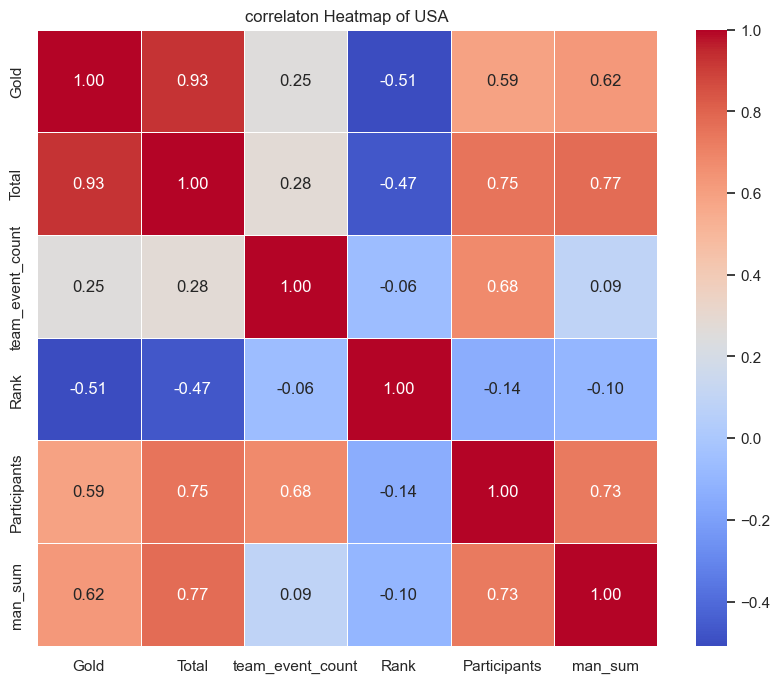

In [252]:
correlation_matrix = medal_USA_all.corr()

# 设置绘图风格
sns.set(style='white')

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('correlaton Heatmap of USA')
plt.show()

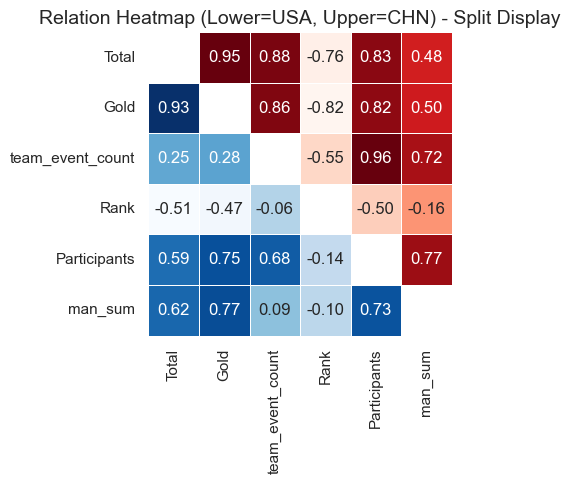

In [248]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 分别计算或读取两个国家的相关性矩阵
# 假设你这两行已有：
# corr_matrix_usa = medal_USA_all.corr(numeric_only=True)
# corr_matrix_chn = medal_CHN_all.corr(numeric_only=True)

# 2) 为每个国家设置遮罩（mask）
#    - mask_usa：用 np.triu() 遮住上三角，留下下三角（含对角）
#    - mask_chn：用 np.tril() 遮住下三角，留下上三角（含对角）
n = corr_matrix_usa.shape[0]
mask_usa = np.triu(np.ones((n, n), dtype=bool), k=0)  # 遮住上三角 => 显示下三角
mask_chn = np.tril(np.ones((n, n), dtype=bool), k=0)  # 遮住下三角 => 显示上三角

# 如果你想让对角线只归属于其中一个矩阵，可手动调整 k=-1 或 k=1，示例：
# mask_usa = np.triu(np.ones((n, n), dtype=bool), k=1)  # 把对角线给下三角
# mask_chn = np.tril(np.ones((n, n), dtype=bool), k=-1) # 把对角线给上三角
# 具体可根据需求灵活选择

# 3) 在同一张图上叠加两次绘制
fig, ax = plt.subplots(figsize=(6, 5))

# (A) 绘制“下三角” - USA
sns.heatmap(
    corr_matrix_usa,
    mask=mask_usa,
    annot=True,     
    fmt=".2f",
    cmap="Blues",   
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar=False,     # 第一次绘图不加 colorbar；如需单独颜色说明，可自行添加
    ax=ax
)

# (B) 绘制“上三角” - CHN
sns.heatmap(
    corr_matrix_chn,
    mask=mask_chn,
    annot=True,
    fmt=".2f",
    cmap="Reds",    
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar=False,     # 第二次绘图同样不加 colorbar
    ax=ax
)

plt.title("Relation Heatmap (Lower=USA, Upper=CHN) - Split Display", fontsize=14)
plt.tight_layout()
plt.show()


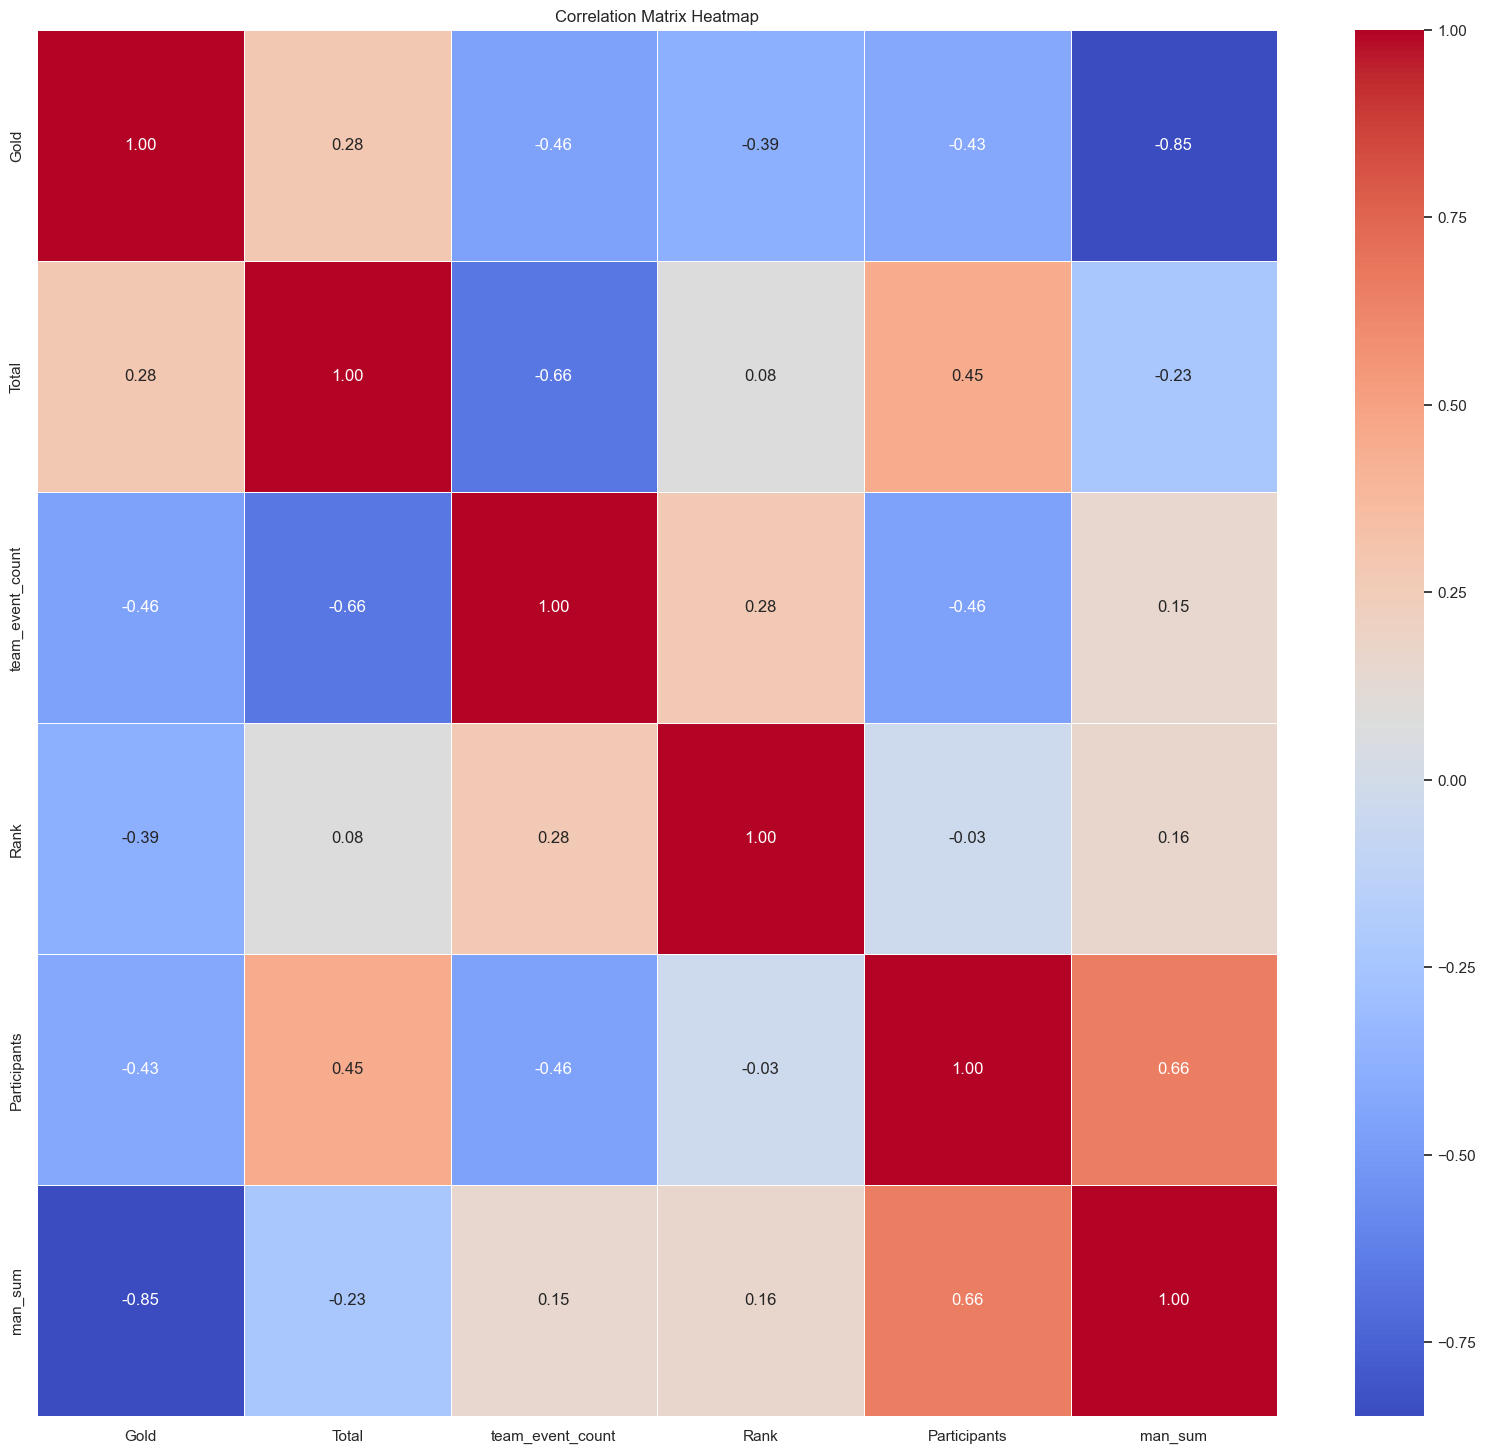

In [227]:
correlation_matrix = medal_USA_col.corr()

# 设置绘图风格
sns.set(style='white')

# 绘制热力图
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [228]:
#获得结论：2000 - 2024 USA
#参加团队项目数和奖牌数成一定负相关性
#男性参赛人数和获得金牌数成强烈负相关性
#参加人数和奖牌数量成正相关性

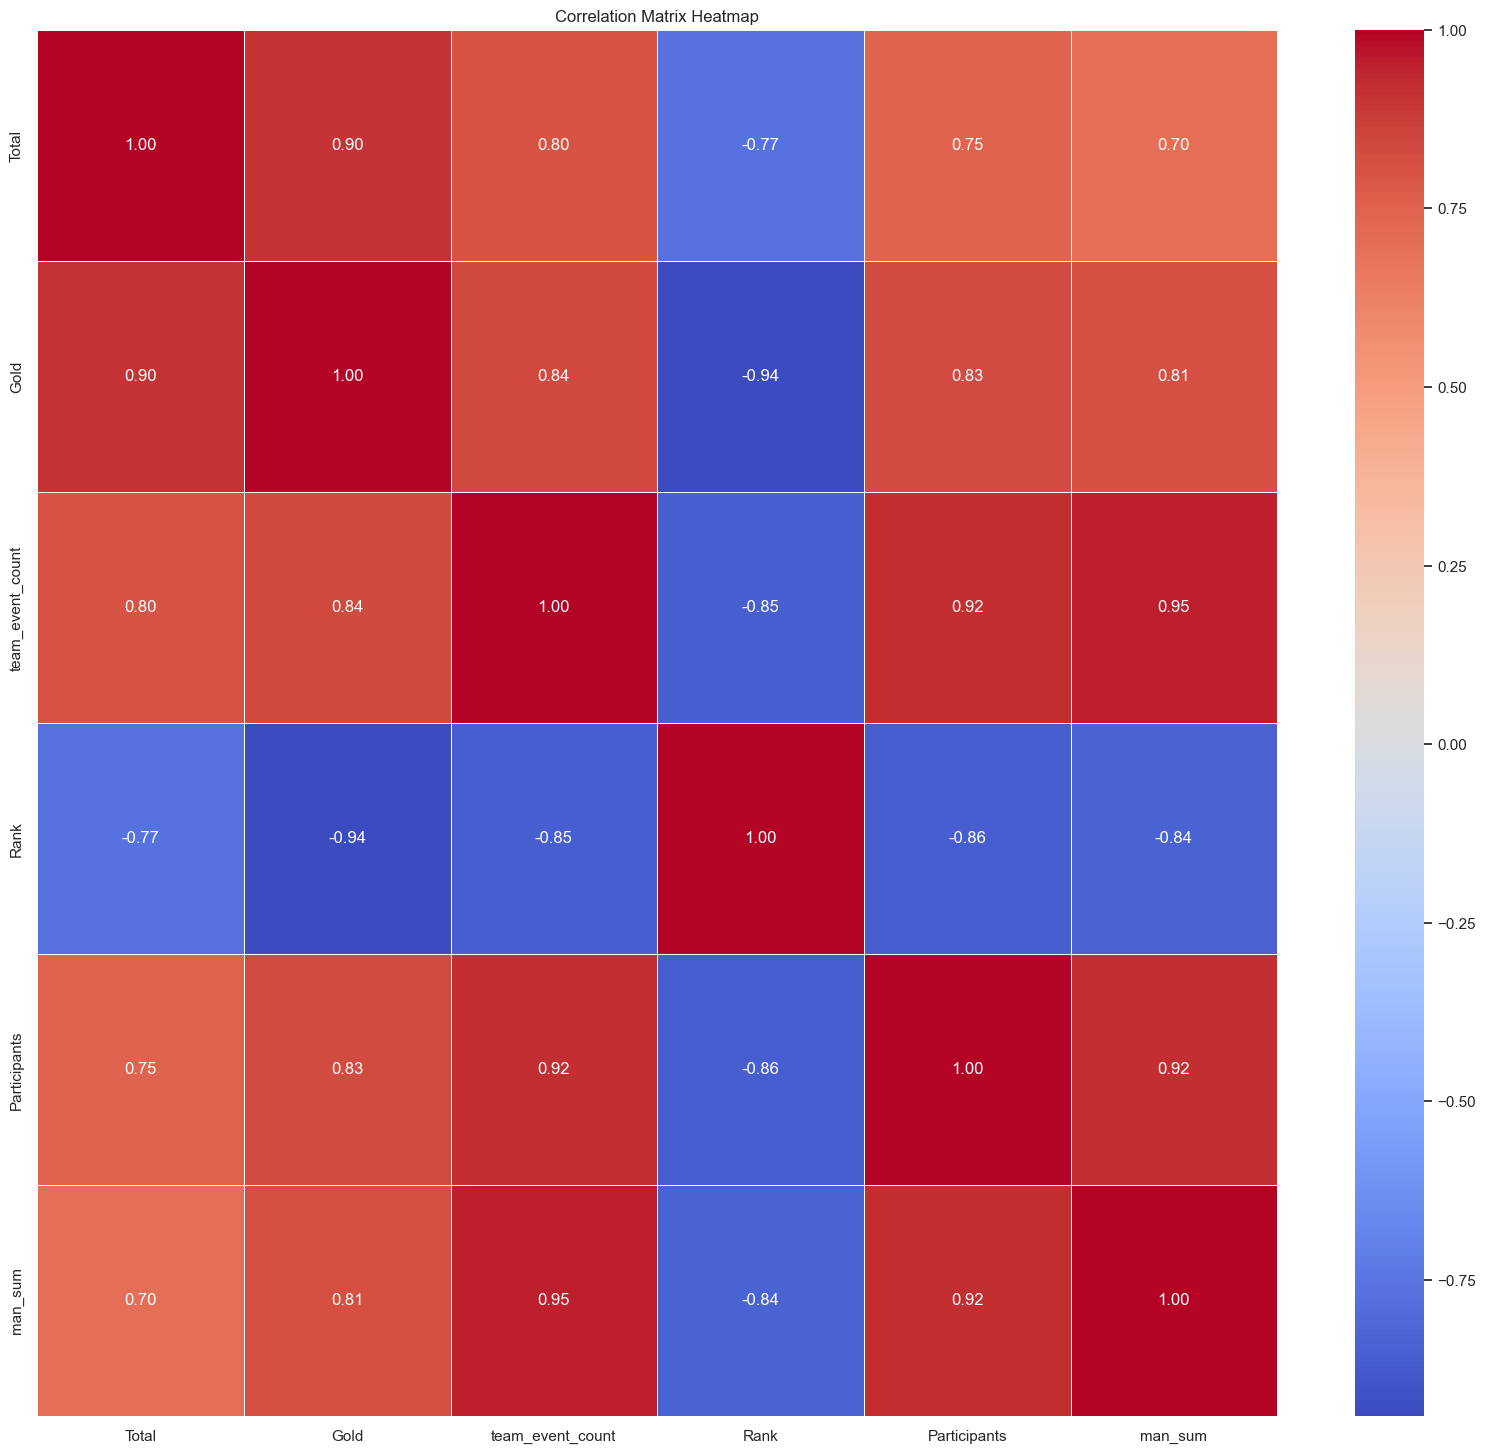

In [229]:
correlation_matrix = medal_CHN_col.corr()

# 设置绘图风格
sns.set(style='white')

# 绘制热力图
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

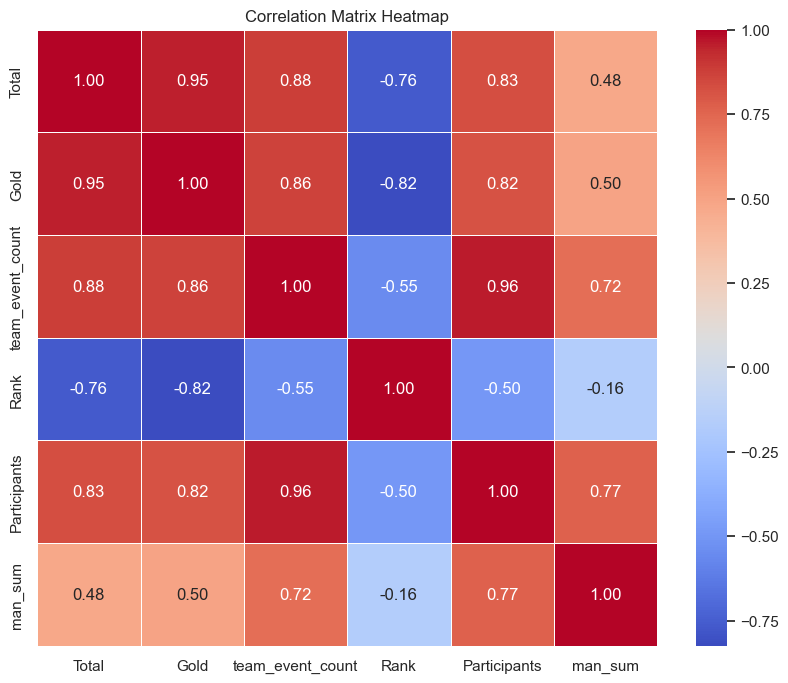

In [ ]:
correlation_matrix = medal_CHN_all.corr()

# 设置绘图风格
sns.set(style='white')

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of CHN')
plt.show()

In [231]:
#CHN
#奖牌数量和团体项目数呈现强相关性
#男性比例和获得金牌数呈现一定负相关

In [232]:
#有趣的结论
#个人主义国家：美国更擅长个人项目
#团体注意国家：中国更擅长团体项目

In [233]:
medal.columns

Index(['Year', 'RNOC', 'Participants', 'Rank', 'NOC', 'Gold', 'Silver',
       'Bronze', 'Total', 'TSport', 'Tevent', 'man_sum', 'team_event_count',
       'Aquatics', 'Archery', 'Athletics', 'Badminton',
       'Baseball and Softball', 'Basketball', 'Basque Pelota', 'Boxing',
       'Breaking', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Equestrian',
       'Fencing', 'Field hockey', 'Football', 'Golf', 'Gymnastics', 'Handball',
       'Jeu de Paume', 'Judo', 'Karate', 'Lacrosse', 'Modern Pentathlon',
       'Polo', 'Rackets', 'Roque', 'Rowing', 'Rugby', 'Sailing', 'Shooting',
       'Skateboarding', 'Sport Climbing', 'Surfing', 'Table Tennis',
       'Taekwondo', 'Tennis', 'Triathlon', 'Tug of War', 'Volleyball',
       'Water Motorsports', 'Weightlifting', 'Wrestling', 'menPropotion'],
      dtype='object')

In [234]:
#探究不同项目对国家奖牌的贡献度，分析出各个国家擅长的项目
medal_sport = medal.drop(columns = ['Participants','Rank','NOC','TSport',"Tevent","man_sum","team_event_count",'menPropotion'])
medal_sport.head()

,Year,RNOC,Gold,Silver,Bronze,Total,Aquatics,Archery,Athletics,Badminton,...,Surfing,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
0,1896,AUS,2,0,0,2,0,0,3,0,...,0,0,0,2,0,0,0,0,0,0
1,1896,GBR,2,3,2,7,0,0,7,0,...,0,0,0,4,0,0,0,0,2,1
2,1896,GRE,10,18,19,47,11,0,36,0,...,0,0,0,13,0,0,0,0,4,2
3,1900,AUS,2,0,3,5,2,0,4,0,...,0,0,0,0,0,0,0,0,0,0
4,1900,BEL,6,7,4,17,12,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
laoFeng = pd.read_csv(r"d:\WeChat\WeChat Files\wxid_llnr1v2qfbb922\FileStorage\File\2025-01\identify_team_events.csv")

In [236]:
laoFeng = laoFeng[~laoFeng["Sport"].isin(["Art Competitions","Alpinism","Aeronautics"])]
#手动进行映射
athSport_to_proSport = {
    # 1
    'Basketball': 'Basketball',
    'Judo': 'Judo',
    'Football': 'Football',
    'Tug-Of-War': 'Tug of War',  
    'Athletics': 'Athletics',
    'Swimming': 'Aquatics',  
    
    # 2
    'Badminton': 'Badminton',
    'Sailing': 'Sailing',
    'Gymnastics': 'Gymnastics',
    #'Art Competitions': 'Others',  # 不在大类列表中，可做特殊处理
    'Handball': 'Handball',
    'Weightlifting': 'Weightlifting',
    'Wrestling': 'Wrestling',
    'Water Polo': 'Aquatics',      # 水球也是属于大类“Aquatics”
    
    # 3
    'Hockey': 'Field hockey',      # 可能需要根据具体语境确认
    'Rowing': 'Rowing',
    'Fencing': 'Fencing',
    'Equestrianism': 'Equestrian', # 贴近大类名称
    'Shooting': 'Shooting',
    'Boxing': 'Boxing',
    'Taekwondo': 'Taekwondo',
    'Cycling': 'Cycling',
    
    # 4
    'Diving': 'Aquatics',          # 跳水也属于“Aquatics”
    'Canoeing': 'Canoeing',
    'Tennis': 'Tennis',
    'Modern Pentathlon': 'Modern Pentathlon',
    'Golf': 'Golf',
    'Softball': 'Baseball and Softball',
    'Archery': 'Archery',
    'Volleyball': 'Volleyball',
    
    # 5
    'Synchronized Swimming': 'Aquatics',  # 现多称“Artistic Swimming”，同属“Aquatics”
    'Table Tennis': 'Table Tennis',
    'Baseball': 'Baseball and Softball',
    'Rhythmic Gymnastics': 'Gymnastics',
    'Rugby Sevens': 'Rugby',
    'Trampolining': 'Gymnastics',         # 奥运归类于体操
    'Beach Volleyball': 'Volleyball',
    'Triathlon': 'Triathlon',
    
    # 6
    'Rugby': 'Rugby',
    'Lacrosse': 'Lacrosse',
    'Polo': 'Polo',
    'Cricket': 'Cricket',
    'Racquets': 'Rackets',         # 大类中拼写为 Rackets
    'Motorboating': 'Water Motorsports',
    'Croquet': 'Croquet',
    'Jeu De Paume': 'Jeu de Paume',
    
    # 7
    'Roque': 'Roque',
    'Basque Pelota': 'Basque Pelota',
    #'Alpinism': 'Others',          # 不在大类列表中，可做特殊处理
    #'Aeronautics': 'Others',       # 不在大类列表中
    'Cycling Road': 'Cycling',
    'Artistic Gymnastics': 'Gymnastics',
    'Karate': 'Karate',
    'Baseball/Softball': 'Baseball and Softball',
    
    # 8
    'Trampoline Gymnastics': 'Gymnastics',
    'Marathon Swimming': 'Aquatics',
    'Canoe Slalom': 'Canoeing',
    'Surfing': 'Surfing',
    'Canoe Sprint': 'Canoeing',
    'Cycling BMX Racing': 'Cycling',
    'Equestrian': 'Equestrian',    # 同“Equestrianism”
    'Artistic Swimming': 'Aquatics',
    
    # 9
    'Cycling Track': 'Cycling',
    'Skateboarding': 'Skateboarding',
    'Cycling Mountain Bike': 'Cycling',
    '3x3 Basketball': 'Basketball',
    'Cycling BMX Freestyle': 'Cycling',
    'Sport Climbing': 'Sport Climbing',
    'Marathon Swimming, Swimming': 'Aquatics', 
    'Breaking': 'Breaking',
    
    # 10 （多项目合并的例子，都可视作“Cycling”或另外拆分）
    'Cycling Road, Cycling Track': 'Cycling',
    'Cycling Road, Cycling Mountain Bike': 'Cycling',
    'Cycling Road, Triathlon': 'Cycling',   
    '3x3 Basketball, Basketball': 'Basketball'
}
laoFeng["type_sport"] = laoFeng["Sport"].map(athSport_to_proSport)
laoFeng_new = laoFeng.groupby(['Country','Year',"type_sport"],as_index = False)[['Gold','Silver','Bronze','Total_medal']].sum()
#aoFeng_new.rename(columns = {"Gold"})
laoFeng_pivot = laoFeng_new.pivot(
    index = ['Country',"Year"],
    columns = 'type_sport',
    values = 'Total_medal',
).reset_index()
laoFeng_pivot = laoFeng_pivot.fillna(0)

In [237]:
rename_col = laoFeng_pivot.columns[2:]
rename_dict = {col: col +"_medal" for col in rename_col}
laoFeng_pivot.rename(columns = rename_dict,inplace = True)
laoFeng_pivot.rename(columns = {"Country":"RNOC"},inplace = True)

In [238]:
medal_new = medal[["Year",'RNOC','Total']]
medal_laoFeng = pd.merge(medal_new,laoFeng_pivot,on = ["Year","RNOC"])

In [255]:
laoFeng.shape

(110718, 15)

In [240]:
medal_laoFeng.head(100)

,Year,RNOC,Total,Aquatics_medal,Archery_medal,Athletics_medal,Badminton_medal,Baseball and Softball_medal,Basketball_medal,Basque Pelota_medal,...,Surfing_medal,Table Tennis_medal,Taekwondo_medal,Tennis_medal,Triathlon_medal,Tug of War_medal,Volleyball_medal,Water Motorsports_medal,Weightlifting_medal,Wrestling_medal
0,1900,USA,48,0.0,0.0,39.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1904,USA,231,45.0,28.0,72.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,14.0,0.0,0.0,3.0,17.0
2,1908,USA,47,6.0,1.0,41.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1912,USA,64,7.0,0.0,49.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1920,USA,95,30.0,0.0,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
5,1924,USA,99,46.0,0.0,48.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,6.0
6,1928,USA,56,30.0,0.0,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,1932,USA,110,35.0,0.0,44.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
8,1936,USA,57,27.0,0.0,34.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
9,1948,USA,84,35.0,0.0,33.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0
